# packages

In [36]:
import vectorbt as vbt
import numpy as np
import pandas as pd
import yaml

# variables

In [37]:
keys = yaml.safe_load(open('..\\keys.yaml', 'r'))

In [38]:
vbt.settings.data['alpaca']['key_id'] = keys['paper_key']
vbt.settings.data['alpaca']['secret_key'] = keys['paper_secret']

# data

In [39]:
data = vbt.AlpacaData.download(symbols='DELL', start='1990-01-01', end='1 day ago UTC', timeframe='1d', limit = 10000)

df = data.get()
df

,Close,High,Low,Open,Volume
timestamp,,,,,
2018-12-28 05:00:00+00:00,43.08,44.100,42.4600,43.62,5088457.0
2018-12-31 05:00:00+00:00,46.35,46.350,43.1500,43.24,6291213.0
2019-01-02 05:00:00+00:00,44.69,46.560,43.6800,45.74,7336484.0
2019-01-03 05:00:00+00:00,42.80,44.570,42.4700,44.15,8084960.0
2019-01-04 05:00:00+00:00,43.64,44.530,42.5400,43.30,10642674.0
...,...,...,...,...,...
2023-12-18 05:00:00+00:00,73.37,73.680,71.0450,71.62,4810275.0
2023-12-19 05:00:00+00:00,73.53,74.010,72.8567,73.70,2684002.0
2023-12-20 05:00:00+00:00,72.42,74.280,72.3100,73.54,4336856.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1256 entries, 2018-12-28 05:00:00+00:00 to 2023-12-22 05:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1256 non-null   float64
 1   High    1256 non-null   float64
 2   Low     1256 non-null   float64
 3   Open    1256 non-null   float64
 4   Volume  1256 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB


<Axes: xlabel='timestamp'>

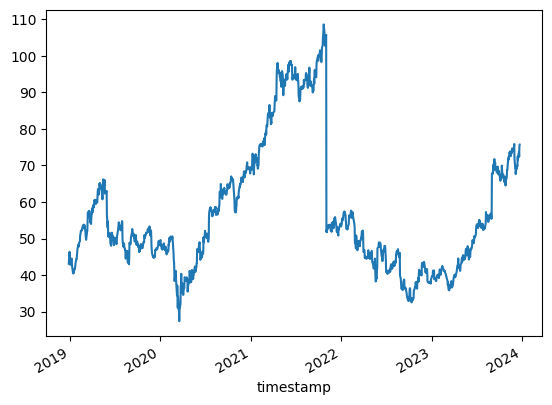

In [5]:
df.Close.plot()

In [6]:
df.loc[:'2021-11-01', ['Close','High', 'Low', 'Open']] = df.loc[:'2021-11-01', ['Close','High', 'Low', 'Open']]/2

<Axes: xlabel='timestamp'>

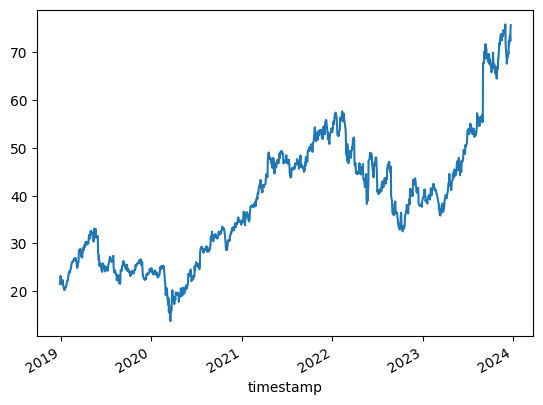

In [7]:
df.Close.plot()

# MA crossover - multiple

In [8]:
price_old = df.loc[:'2023-01-01', 'Close']
price_new = df.loc['2023-01-01':, 'Close']

In [12]:
windows = np.arange(10, 200)
#fast_window = np.arange(10, 200)
#slow_window = np.arange(10, 200)
#fast_ma = vbt.MA.run(price_new, fast_window)
#slow_ma = vbt.MA.run(price_new, slow_window)
fast_ma, slow_ma = vbt.MA.run_combs(price_old, windows)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
portfolio = vbt.Portfolio.from_signals(price_old, entries, exits, freq = '1d', direction = 'longonly')

In [13]:
portfolio.total_return()

ma_1_window  ma_2_window
10           11             0.048941
             12             0.055053
             13             0.020225
             14             0.049768
             15             0.421603
                              ...   
196          198            0.272867
             199            0.180823
197          198            0.401520
             199            0.221089
198          199            0.226715
Name: total_return, Length: 17955, dtype: float64

In [14]:
entries.head().iloc[:, :10]

ma_1_window                   10                                            \
ma_2_window                   11     12     13     14     15     16     17   
timestamp                                                                    
2018-12-28 05:00:00+00:00  False  False  False  False  False  False  False   
2018-12-31 05:00:00+00:00  False  False  False  False  False  False  False   
2019-01-02 05:00:00+00:00  False  False  False  False  False  False  False   
2019-01-03 05:00:00+00:00  False  False  False  False  False  False  False   
2019-01-04 05:00:00+00:00  False  False  False  False  False  False  False   

ma_1_window                                     
ma_2_window                   18     19     20  
timestamp                                       
2018-12-28 05:00:00+00:00  False  False  False  
2018-12-31 05:00:00+00:00  False  False  False  
2019-01-02 05:00:00+00:00  False  False  False  
2019-01-03 05:00:00+00:00  False  False  False  
2019-01-04 05:00:00+00:00  False  False  False

In [15]:
portfolio.total_return()[37, 49]

1.2043060543573076

# MA crossover - single strategy

In [16]:
fast_ma = vbt.MA.run(price_new, 37)
slow_ma = vbt.MA.run(price_new, 49)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
portfolio = vbt.Portfolio.from_signals(price_new, entries, exits, freq = '1d', direction = 'longonly')
portfolio.total_return()

0.72221895822129

In [17]:
portfolio

In [18]:
print(portfolio.stats())

Start                         2023-01-03 05:00:00+00:00
End                           2023-12-22 05:00:00+00:00
Period                                246 days 00:00:00
Start Value                                       100.0
End Value                                    172.221896
Total Return [%]                              72.221896
Benchmark Return [%]                          90.609265
Max Gross Exposure [%]                            100.0
Total Fees Paid                                     0.0
Max Drawdown [%]                              10.860683
Max Drawdown Duration                  39 days 00:00:00
Total Trades                                          2
Total Closed Trades                                   1
Total Open Trades                                     1
Open Trade PnL                                 4.754243
Win Rate [%]                                      100.0
Best Trade [%]                                67.467652
Worst Trade [%]                               67

In [19]:
portfolio.plot().show()

In [20]:
help(vbt.Portfolio.from_signals)

Help on method from_signals in module vectorbt.portfolio.base:

from_signals(close: Union[str, float, int, complex, bool, object, numpy.generic, Sequence[Union[str, float, int, complex, bool, object, numpy.generic]], Sequence[Sequence[Any]], vectorbt._typing.SupportsArray, numpy.ndarray, pandas.core.indexes.base.Index, pandas.core.series.Series, pandas.core.frame.DataFrame], entries: Union[str, float, int, complex, bool, object, numpy.generic, Sequence[Union[str, float, int, complex, bool, object, numpy.generic]], Sequence[Sequence[Any]], vectorbt._typing.SupportsArray, numpy.ndarray, pandas.core.indexes.base.Index, pandas.core.series.Series, pandas.core.frame.DataFrame, NoneType] = None, exits: Union[str, float, int, complex, bool, object, numpy.generic, Sequence[Union[str, float, int, complex, bool, object, numpy.generic]], Sequence[Sequence[Any]], vectorbt._typing.SupportsArray, numpy.ndarray, pandas.core.indexes.base.Index, pandas.core.series.Series, pandas.core.frame.DataFrame, No

# walk-forward optimization

In [21]:
figure = price_old.vbt.rolling_split(n = 20,
                            window_len = 360,
                            set_lens = (108,),
                            left_to_right = False,
                            plot = True)
figure.update_layout(width = 800, height = 400)
figure.show()

c:\Users\User\miniforge3\envs\py310_calpha\lib\site-packages\jupyter_client\session.py:721: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant

c:\Users\User\miniforge3\envs\py310_calpha\lib\site-packages\jupyter_client\session.py:721: UserWarning:

Message serialization failed with:
Out of range float values are not JSON compliant
Supporting this message is deprecated in jupyter-client 7, please make sure your message is JSON-compliant



In [22]:
(in_sample_prices, in_sample_dates), (out_sample_prices, out_sample_dates) = price_old.vbt.rolling_split(n = 20,
                            window_len = 360,
                            set_lens = (108,),
                            left_to_right = False)

In [23]:
in_sample_prices

split_idx,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,21.540,26.100,29.630,31.390,26.790,24.275,23.700,22.455,23.125,15.405,20.700,24.775,28.305,32.345,32.405,36.395,39.640,47.650,49.215,45.895
1,23.175,26.335,29.270,31.490,27.215,25.095,23.850,22.625,23.320,16.095,20.565,25.490,28.460,31.995,32.900,33.775,39.260,48.085,49.305,45.815
2,22.345,26.335,30.010,28.235,26.935,25.300,24.185,23.470,24.195,18.420,20.035,26.050,28.380,31.965,33.350,34.735,40.470,47.595,48.715,45.660
3,21.400,26.640,30.280,26.485,26.755,25.745,24.505,23.400,24.085,18.655,19.455,25.740,28.290,32.555,32.885,35.210,40.355,47.755,48.775,46.675
4,21.820,26.855,30.115,27.350,26.295,26.305,24.460,23.465,25.060,20.170,19.850,25.485,28.670,32.430,33.105,35.495,41.010,47.140,48.720,46.180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247,23.530,24.780,18.755,21.175,25.460,29.460,33.500,33.440,35.885,42.345,46.365,47.415,46.670,49.925,53.770,55.470,53.850,44.870,48.970,41.690
248,23.925,25.275,17.495,21.050,25.335,29.600,33.210,33.625,36.050,42.240,45.765,47.305,47.590,49.970,53.770,54.980,52.960,44.520,48.720,42.180
249,24.100,24.920,17.610,20.420,24.550,31.395,33.265,34.190,35.020,43.280,46.660,47.045,47.660,49.335,53.110,55.040,48.800,44.990,47.780,41.780
250,24.660,25.075,17.280,21.080,24.895,31.335,32.955,33.370,35.050,41.780,47.310,46.980,47.430,50.160,53.010,54.990,48.330,45.820,48.840,42.610


## same slow and fast MA window

In [24]:
windows = np.arange(10, 50)
fast_ma, slow_ma = vbt.MA.run_combs(in_sample_prices, windows)
entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
portfolio = vbt.Portfolio.from_signals(in_sample_prices, entries, exits, freq = '1d', direction = 'longonly')

performance = portfolio.sharpe_ratio()
print(performance.head())


ma_1_window  ma_2_window  split_idx
10           11           0            1.867626
                          1            0.982698
                          2           -0.196488
                          3            0.072002
                          4           -0.072779
Name: sharpe_ratio, dtype: float64


In [25]:
print(windows)

[10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33
 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49]


In [26]:
print(fast_ma.ma[:20])

ma_1_window       10                                                        \
split_idx         0        1        2        3        4        5        6    
0                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
1                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
3                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
4                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
5                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
7                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
8                NaN      NaN      NaN      NaN      NaN      NaN      NaN   
9            21.9245  26.5405  29.8915  27.3240  26.6650  25.5180  24.7290   
10           21.8000  26.5440  30.0105  26.6995  26.7240  25.594

In [27]:
fast_ma.ma.columns

MultiIndex([(10,  0),
            (10,  1),
            (10,  2),
            (10,  3),
            (10,  4),
            (10,  5),
            (10,  6),
            (10,  7),
            (10,  8),
            (10,  9),
            ...
            (48, 10),
            (48, 11),
            (48, 12),
            (48, 13),
            (48, 14),
            (48, 15),
            (48, 16),
            (48, 17),
            (48, 18),
            (48, 19)],
           names=['ma_1_window', 'split_idx'], length=15600)

In [28]:
slow_ma.ma.columns

MultiIndex([(11,  0),
            (11,  1),
            (11,  2),
            (11,  3),
            (11,  4),
            (11,  5),
            (11,  6),
            (11,  7),
            (11,  8),
            (11,  9),
            ...
            (49, 10),
            (49, 11),
            (49, 12),
            (49, 13),
            (49, 14),
            (49, 15),
            (49, 16),
            (49, 17),
            (49, 18),
            (49, 19)],
           names=['ma_2_window', 'split_idx'], length=15600)

In [29]:
df_performance = performance.reset_index()
max_sharpe_idx = df_performance.groupby('split_idx')['sharpe_ratio'].idxmax()

# Use the index to find corresponding rows in the original DataFrame
max_sharpe_per_split = df_performance.loc[max_sharpe_idx]
max_sharpe_per_split

,ma_1_window,ma_2_window,split_idx,sharpe_ratio
15220,43,46,0,2.515229
15221,43,46,1,2.669035
15062,42,44,2,1.096858
15063,42,44,3,1.315840
14284,38,39,4,1.648833
13045,33,42,5,2.338769
13046,33,42,6,3.043542
14307,38,40,7,2.770812
4388,16,17,8,2.872709
12549,32,33,9,3.011362


## different slow and fast MA windows

In [30]:
fast_ma_window = np.arange(10, 50)
slow_ma_window = np.arange(50, 90)

fast_ma = vbt.MA.run(in_sample_prices, fast_ma_window)
slow_ma = vbt.MA.run(in_sample_prices, slow_ma_window)

entries = fast_ma.ma_crossed_above(slow_ma)
exits = fast_ma.ma_crossed_below(slow_ma)
portfolio = vbt.Portfolio.from_signals(in_sample_prices, entries, exits, freq = '1d', direction = 'longonly')

performance = portfolio.sharpe_ratio()
performance.head()

ma_window  ma_window  split_idx
10         50         0           -2.641549
                      1           -2.430183
                      2           -3.297120
                      3           -2.009352
                      4           -0.348927
Name: sharpe_ratio, dtype: float64

In [31]:
performance

ma_window  ma_window  split_idx
10         50         0           -2.641549
                      1           -2.430183
                      2           -3.297120
                      3           -2.009352
                      4           -0.348927
                                     ...   
49         89         15           1.222477
                      16          -0.249637
                      17           0.054921
                      18                inf
                      19                inf
Name: sharpe_ratio, Length: 800, dtype: float64

In [32]:
portfolio.stats(agg_func=None)

Start  End   Period  Start Value   End Value  \
ma_window ma_window split_idx                                                 
10        50        0              0  251 252 days        100.0   69.991954   
                    1              0  251 252 days        100.0   71.550508   
                    2              0  251 252 days        100.0   59.067776   
                    3              0  251 252 days        100.0   70.465935   
                    4              0  251 252 days        100.0   90.358737   
...                              ...  ...      ...          ...         ...   
49        89        15             0  251 252 days        100.0  113.807615   
                    16             0  251 252 days        100.0   94.789579   
                    17             0  251 252 days        100.0   98.777555   
                    18             0  251 252 days        100.0  100.000000   
                    19             0  251 252 days        100.0  100.000000   

                               Total Return [%]  Benchmark Return [%]  \
ma_window ma_window split_idx                                           
10        50        0                -30.008046             12.233055   
                    1                -28.449492             -4.137931   
                    2                -40.932224            -37.732028   
                    3                -29.534065            -31.156419   
                    4                 -9.641263             -6.756252   
...                                         ...                   ...   
49        89        15                13.807615             56.037917   
                    16                -5.210421             19.323915   
                    17                -1.222445             -1.804827   
                    18                 0.000000             -2.346845   
                    19                 0.000000             -6.721865   

                               Max Gross Exposure [%]  Total Fees Paid  \
ma_window ma_window split_idx                                            
10        50        0                           100.0              0.0   
                    1                           100.0              0.0   
                    2                           100.0              0.0   
                    3                           100.0              0.0   
                    4                           100.0              0.0   
...                                               ...              ...   
49        89        15                          100.0              0.0   
                    16                          100.0              0.0   
                    17                          100.0              0.0   
                    18                            0.0              0.0   
                    19                            0.0              0.0   

                               Max Drawdown [%]  ... Avg Winning Trade [%]  \
ma_window ma_window split_idx                    ...                         
10        50        0                 30.634343  ...                   NaN   
                    1                 30.634343  ...                   NaN   
                    2                 41.460771  ...                   NaN   
                    3                 38.158887  ...                   NaN   
                    4                 34.410168  ...                   NaN   
...                                         ...  ...                   ...   
49        89        15                 9.020941  ...                   NaN   
                    16                17.924692  ...                   NaN   
                    17                18.827000  ...                   NaN   
                    18                      NaN  ...                   NaN   
                    19                      NaN  ...                   NaN   

                               Avg Losing Trade [%]  \
ma_window ma_window 

# TODOS

In [33]:
# backtesting jednej strategie
#   MA cross over - len long
#   na jednom tickeri
#   na viacerych tickeroch
# walk forward optimization
# nahodit ju na paper account